# Linear regression

In statistics, linear regression is a linear approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

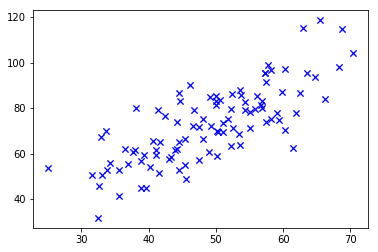

In [4]:
data = np.genfromtxt("l1_data.csv", delimiter=",")
plt.plot(data[:,0], data[:, 1], 'bx')
plt.show()

So, we have X matrix n x k, where K is number of features and N is training examples and Y vector with ground truth. When predicting Y value, we need the way to measure how close prediction is. 

*Learning* here is to find $\theta$ with smallest Loss. Generally speaking, $\theta$ are coefficients of X's in some equation (hypothesis)

Let's define *Loss* function here:
$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

Where $h_{\theta}$ is our hypothesis function: $h_{\theta} = \theta^{T} x$


##### Our goal is to minimize the loss with respect to $\theta$.


One way to do it is using gradient descent. We have to take the derivative of J w.r.t to each $\theta$. Long story short, this is the result: ($ \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}$)


##### Now we could go and use gradient descent.

Before running gradient descent for $\theta$ we should take random initial $\theta$ as baseline

After this, we could use gradient descent to update $\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$)


Here we have a new term: $\alpha$ is *learning rate*. This indicates how *fast* the funtion will converge to local minima. If rate is too small - this will take a lot of time, too big - you can overshoot the minima

##### When implementing - it's way better to use vectorized implementations of this formulas


### Let's start with preparing data

In [8]:
def split_data(data):
    examples, features = data.shape
    # features - 1 because last column is value we are trying to predict
    return (data[0:, :features - 1], data[0:, features - 1])

x, y  = split_data(data)

Now we are ready to start writing train function. One trick we should apply is to add bias column to our train data. 
In linear regression, without the bias term your solution has to go through the origin. That is, when all of your features are zero, your predicted value would also have to be zero. However, that may not be the answer the training data suggests. Adding a bias weight that does not depend on any of the features allows the hyperplane desbribed by your learned weights to more easily fit data that doesn't pass through the origin.  

In [62]:
def train(x, y, lr=0.0001, iter=15):
    m, features = x.shape
    # init theta with zeros 
    theta = np.zeros(features + 1)
    # adding bias value
    x_bias = np.column_stack((np.ones(m), x))
    # collecting all costs to plot later
    costs = []
    for i in range(iter):
        cost = (1 / (2 * m)) * np.sum((np.sum(np.transpose(theta) * x_bias, axis=1) - y) ** 2)
        costs = [*costs, cost]
        theta = theta - (
            lr * (1 / m) * np.sum((np.sum(np.transpose(theta) * x_bias, axis=1) - y) * np.transpose(x_bias), axis=1))
    return theta, costs


In [63]:
#Train theta
theta, costs = train(x, y)

In [64]:
def plot_data(data, predicted, costs):
    x, y = data
    fig, (g1, g2) = plt.subplots(nrows=2, ncols=1)
    g1.plot(x, y, 'bo', markersize=2)
    g1.plot(x, predicted, 'ro', markersize=2)
    g1.axis([x.min() - x.mean() / 10, x.max() + x.mean()/ 10, y.min() - y.mean()/ 10, y.max() + y.mean()/ 10])
    g2.plot(costs)
    plt.show()

    
def predict(theta, x):
    m, features = x.shape
    x_bias = np.column_stack((np.ones(m), x))
    y = np.sum(np.transpose(theta) * x_bias, axis=1)
    return y

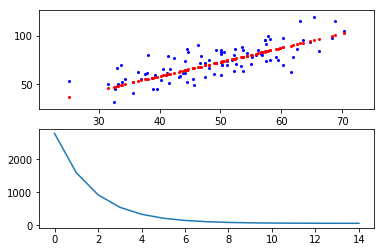

In [65]:
plot_data((x, y), predict(theta, x), costs)

In [71]:
print("Last cost value: ", costs[-1])

Last cost value:  57.2172085263
